## **Convert RGB color images to BW grayscale data**
Author : *Kélian Sommer*<br>
This notebook aims to convert the publicly available datasets SWIMSEG, SWINSEG, HYTA and TLCDD to grayscale images using opencv.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import *

import sys
sys.path.append('../utilities')
from utilities import *
from mask_generator import *

import multiprocessing
num_cores = multiprocessing.cpu_count()
from joblib import parallel_backend, Parallel, delayed
from dask.distributed import Client
client = Client()

import glob

%matplotlib widget

2023-09-16 17:26:47.442308: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-16 17:26:47.444497: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 17:26:47.487071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 17:26:47.487530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 17:26:48.025878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

#### **Open RGB image with opencv**

In [2]:
image_rgb = cv2.imread('../fits_samples/color_sky_sample.jpg')

#### **Plot image in color**

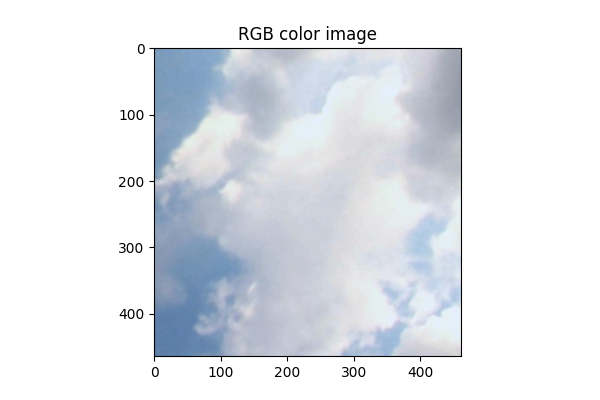

In [3]:
plt.figure(figsize=(6,4))
plt.title('RGB color image')
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.show()

#### **Convert it to grayscale image**

In [4]:
# Convert the RGB image to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

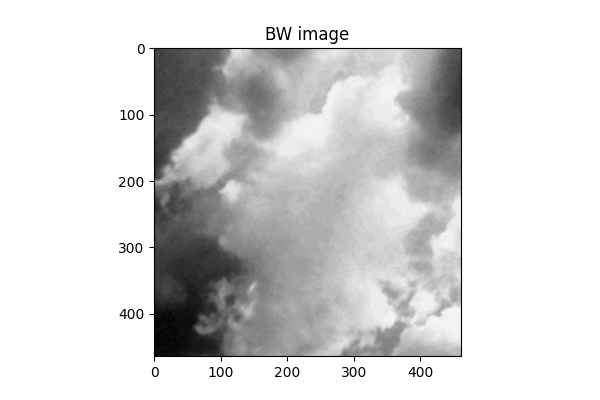

In [5]:
plt.figure(figsize=(6,4))
plt.title('BW image')
plt.imshow(gray_image, cmap='gray')
plt.show()

### **Applies the transformation datasets**

### **HYTA**

This repository contains all the images and ground-truth maps of the HYTA dataset. This dataset was first reported in the paper `Q. Li, W. Lu, J. Yang, A Hybrid Thresholding Algorithm for Cloud Detection on Ground-Based Color Images, Journal of Atmospheric and Oceanic Technology, 2011`, and is published here with permission from the authors.

This repository contains the following:

* Input images are inside folder `images`
* Binary (2-level) ground-truth maps are inside folder `2GT`
* Ternary (3-level) ground-truth maps are inside folder `3GT`

If you are interested in using the input images and the binary ground-truth maps, please cite the following:

> Q. Li, W. Lu, J. Yang, A Hybrid Thresholding Algorithm for Cloud Detection on Ground-Based Color Images, *Journal of Atmospheric and Oceanic Technology*, 2011.

Furthermore, if you intend to use the 3-level ground-truth maps, please cite the following:

> S. Dev, Y. H. Lee, S. Winkler, Multi-level semantic labelling of sky/cloud images, *Proc. IEEE International Conference on Image Processing (ICIP)*, 2015.

In [6]:
HYTA_root_dir = '../public_datasets/HYTA/'
HYTA_rgb_dir = HYTA_root_dir + 'images/'
HYTA_rgb_list = glob.glob(HYTA_rgb_dir+'/*.jpg')
HYTA_gray_dir = HYTA_root_dir + 'grayscaled/'
# Check if the new folder exists, and create it if it doesn't.
if not os.path.exists(HYTA_gray_dir):
    os.makedirs(HYTA_gray_dir)

In [7]:
with parallel_backend('threading', n_jobs=num_cores):
    gray_images = Parallel(verbose=5)(delayed(rgb_to_gray)(image_path=filename, output_path=HYTA_gray_dir) for filename in HYTA_rgb_list)

../public_datasets/HYTA/grayscaled/U6_gray.jpg
../public_datasets/HYTA/grayscaled/U1_gray.jpg
../public_datasets/HYTA/grayscaled/U2_gray.jpg
../public_datasets/HYTA/grayscaled/B2_gray.jpg
../public_datasets/HYTA/grayscaled/B9_gray.jpg
../public_datasets/HYTA/grayscaled/C1_gray.jpg
../public_datasets/HYTA/grayscaled/B11_gray.jpg
../public_datasets/HYTA/grayscaled/U7_gray.jpg
../public_datasets/HYTA/grayscaled/C7_gray.jpg
../public_datasets/HYTA/grayscaled/U3_gray.jpg
../public_datasets/HYTA/grayscaled/U8_gray.jpg
../public_datasets/HYTA/grayscaled/B4_gray.jpg
../public_datasets/HYTA/grayscaled/B10_gray.jpg
../public_datasets/HYTA/grayscaled/C4_gray.jpg
../public_datasets/HYTA/grayscaled/C2_gray.jpg
../public_datasets/HYTA/grayscaled/B7_gray.jpg
../public_datasets/HYTA/grayscaled/B1_gray.jpg
../public_datasets/HYTA/grayscaled/C8_gray.jpg
../public_datasets/HYTA/grayscaled/C3_gray.jpg
../public_datasets/HYTA/grayscaled/B13_gray.jpg
../public_datasets/HYTA/grayscaled/C9_gray.jpg
../public_

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  24 out of  32 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  32 out of  32 | elapsed:    0.1s finished


## **WSISEG**

**WARNING**: data consists of all-sky non-cropped images. Some additional work may be necessary to be usable by our own algorithm.<br>

The database contains 400 uncropped whole sky images and corresponding labels.In these annotation images, cloud, clear sky and undefined area are marked with gray value 255, 100, 0 respectively.

In [ ]:
WSISEG_root_dir = '../public_datasets/WSISEG/'
WSISEG_rgb_dir = WSISEG_root_dir + 'images/'
WSISEG_rgb_list = glob.glob(WSISEG_rgb_dir+'/*.jpg')
WSISEG_gray_dir = WSISEG_root_dir + 'grayscaled/'
# Check if the new folder exists, and create it if it doesn't.
if not os.path.exists(WSISEG_gray_dir):
    os.makedirs(WSISEG_gray_dir)